# Clasificación supervisada: cuadrados mínimos
 
Candela Herrera

# Summary


Given inputs $\mathbf{x}_i$ (vectorized images) and outputs $y_i \in \{-1,+1\}$ (labels), we propose a *model* $f(\mathbf{x};\mathbf{w})=\mathbf{w}\cdot\mathbf{x}$, and optimize to obtain $\mathbf{w}^*$ that best fits the given images with their labels.


### $$\{\mathbf{x}_i,{\color{green}{y_i}}\},  \quad f(\mathbf{x};\mathbf{w})=  \mathbf{w}\cdot\mathbf{x},{\quad} {\hat{\color{red}{y_i}}} = \color{blue}{\phi}\left(f(x_i;\mathbf{w})\right) \approx \color{green}{y_i}.$$ 


Once obtained $\mathbf{w}^*$, we classify using the following **threshold function** on the results: 

$$ c(\mathbf{x})=\color{blue}{\textrm{sign}}\left(f(\mathbf{x};\mathbf{w}^*)\right).$$ 

In this way, when $f(\cdot)>0$ we have $+1$ as the predicted label, and when $f(\cdot)<0$, we have $-1$ as the predicted label.

Let $\mathbf{X}$ be the  matrix  that holds the vectorized images in each of its **columns**:

$$ \mathbf{X}^{\top} =
\begin{bmatrix}
  \vert && \vert && \vert  && \vert \\
 \mathbf{x}_1 &&  \mathbf{x}_2  && \vdots && \mathbf{x}_n \\
 \vert && \vert && \vert   && \vert \\
\end{bmatrix}.
$$

The  **least-squares solution** to the system of equations 

## $$\mathbf{w}\mathbf{X} = \mathbf{y}$$

is given by

$$ \mathbf{w}^* = \mathbf{y}\mathbf{X}^{\dagger},$$

with $\mathbf{X}^{\dagger}$ the  pseudo inverse Moore-Penrose matrix.




In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def Plot(X,cmap="bone"):
    plt.imshow(X.reshape(nx,ny).transpose(),cmap=cmap)
    plt.axis("off")
    return

In [3]:
# Load dataset:
# There is a total of 160 images of 32x32 pixels (80 dogs, 80 cats).
dogs  = np.load("./dogData.npy")
cats  = np.load("./catData.npy")
CD    = np.concatenate((dogs,cats),axis=1)
nx,ny = 32,32

# Normalize
dogs = (dogs - dogs.mean() ) / dogs.std()
cats = (cats - cats.mean() ) / cats.std()


# Training dataset
x_train = np.concatenate((dogs[:,:60],cats[:,:60]),axis=1)  # classes are balanced
y_train = np.repeat(np.array([1,-1]),60)
# Test dataset
x_test  = np.concatenate((dogs[:,60:80],cats[:,60:80]),axis=1)
y_test  = np.repeat(np.array([1,-1]),20)

In [4]:
# Let's check the dataset shapes:
dogs.shape,cats.shape,CD.shape, x_train.shape, y_train.shape, nx*ny, 

((1024, 80), (1024, 80), (1024, 160), (1024, 120), (120,), 1024)

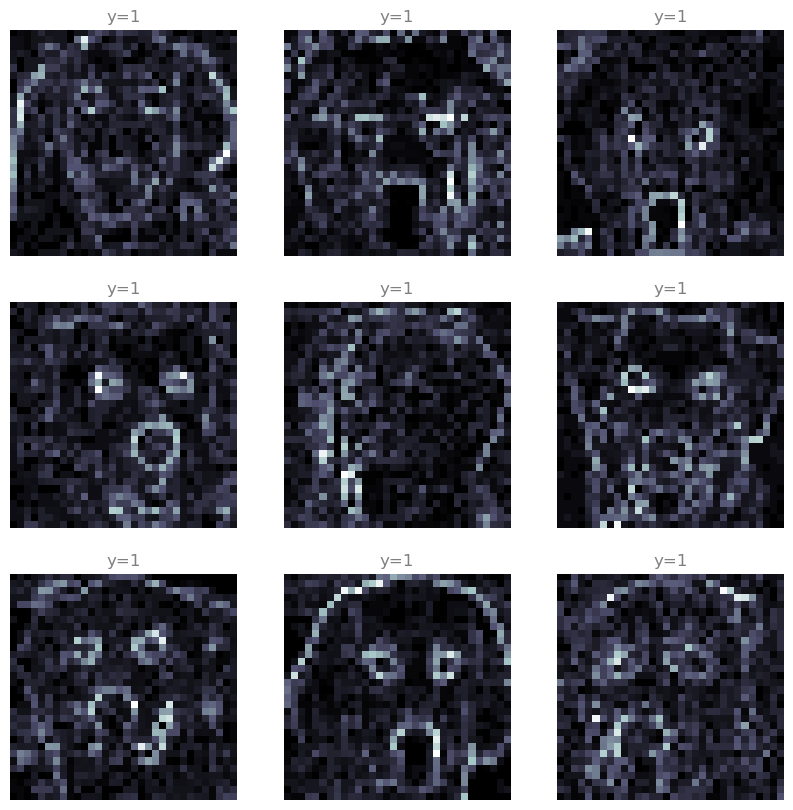

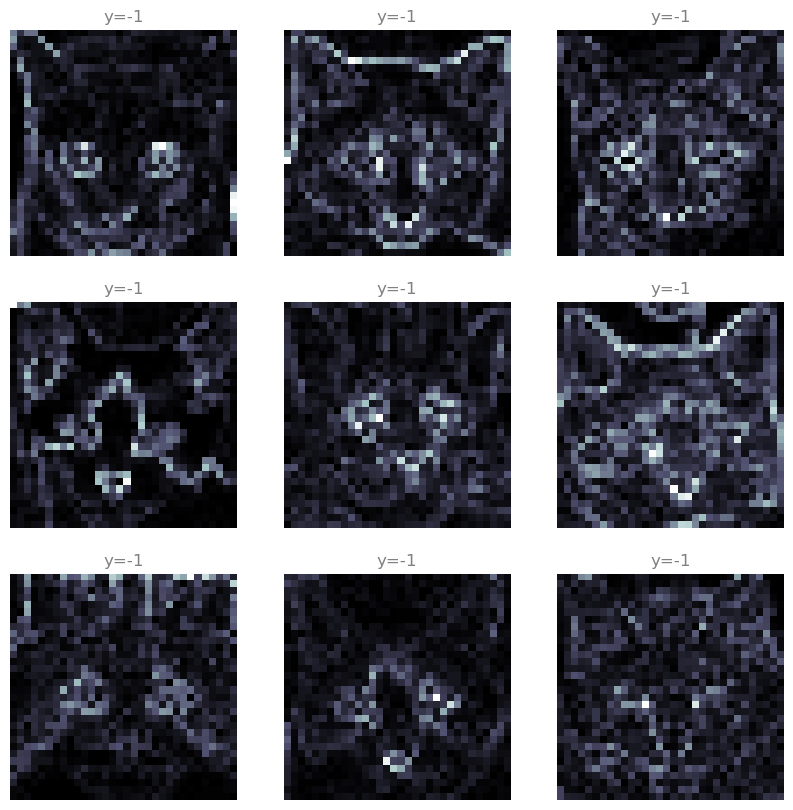

In [5]:
# Plot some images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    Plot(x_train[:,i], cmap=plt.cm.bone)
    plt.title("y="+str(y_train[i]),color="gray",fontsize=12)
plt.show()
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    Plot(x_train[:,-(i+1)], cmap=plt.cm.bone)
    plt.title("y="+str(y_train[-(i+1)]),color="gray",fontsize=12)
plt.show()


# Least squares solution

In [6]:
# Least squares solution:
w       = y_train @ np.linalg.pinv(x_train)

Display weights reshaped as 2D array to visualize spatial structures, and as 1D array to check amplitudes.

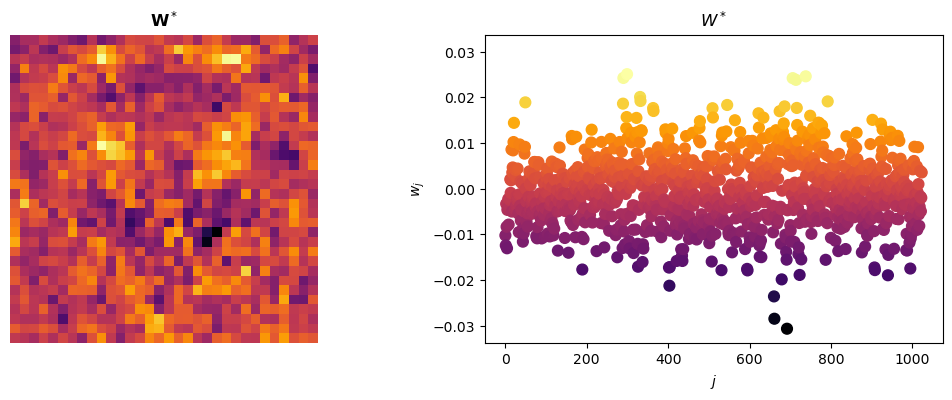

In [7]:
# Plot weights
val = 1.1*np.max(np.abs(w))
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.title("$\mathbf{W}^*$")#  (reshaped as image)")
Plot(w,cmap="inferno")
plt.subplot(1,2,2)
plt.title("$W^*$")#Weights")
plt.scatter(range(len(w)),w,s=60,c=w,cmap="inferno",linewidth=1,marker="o",alpha=1)
plt.xlabel("$j$")
plt.ylabel("$w_j$")
plt.ylim([-val,+val])
plt.show()

The model prediction for a vectorized image $\hat{\mathbf{x}}$ is given by $\mathbf{w}^*\cdot\hat{\mathbf{x}}$. To this result, we assign the label by threholding with $\text{sign}(\cdot)$.

In [8]:
# Predictions on test data:
y_raw   = w@x_test
y_pred  = np.sign(y_raw) # the sign() function is to give only -1,+1 results.

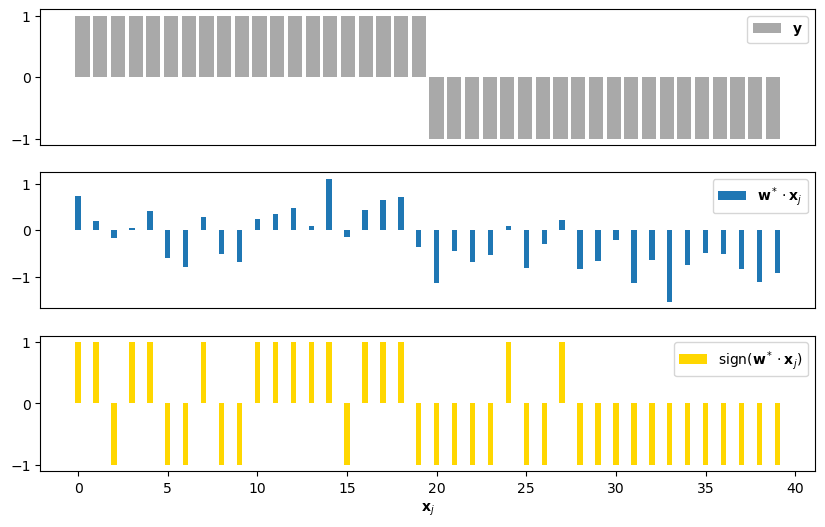

In [9]:
# Plot of true labels, raw predictions, and thresholded predictions.
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.bar(range(len(y_pred)),y_test,color="darkgray",lw=4,label="$\mathbf{y}$")
plt.xticks([])
plt.legend()
plt.subplot(3,1,2)
plt.bar(range(len(y_pred)),y_raw,width=0.3,label="$\mathbf{w}^*\cdot\mathbf{x}_j$")
plt.legend()
plt.xticks([])
plt.subplot(3,1,3)
plt.bar(range(len(y_pred)),y_pred,color="gold",width=0.3,label="sign($\mathbf{w}^*\cdot\mathbf{x}_j)$")
plt.xlabel("$\mathbf{x}_j$")
plt.legend()
plt.show()

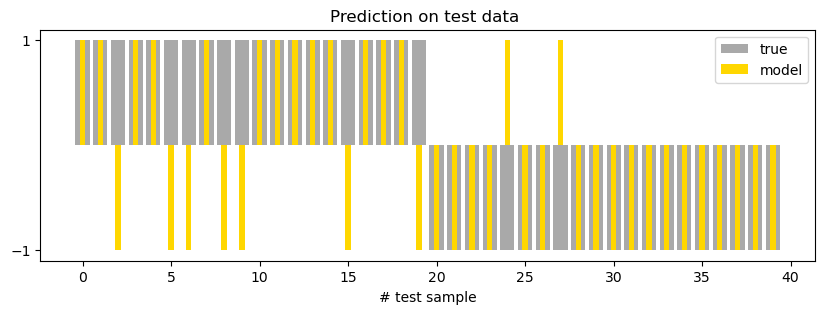

In [10]:
# Plot predictions
plt.figure(figsize=(10,3))
plt.title("Prediction on test data ")
plt.bar(range(len(y_pred)),y_test,color="darkgray",lw=4,label="true")
plt.bar(range(len(y_pred)),y_pred,color="gold",width=0.3,label="model")
plt.yticks([-1,+1])
plt.xlabel("# test sample")
#plt.ylabel("Model prediction on test data")
plt.legend()
plt.show()

In [11]:
matched = y_pred == y_test

print("Accuracy [%] = ",100*matched.mean())

Accuracy [%] =  77.5


Analysis of the model predictions:

In [12]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

CM             = confusion_matrix(y_test, y_pred) 
tn, fp, fn, tp = CM.ravel()

accuracy  = (tp+tn)/np.sum(CM)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)

print(CM)
print("Accuracy  [%] = ",100*accuracy)
print("Precision [%] = ",100*precision)
print("Recall    [%] = ",100*recall)

[[18  2]
 [ 7 13]]
Accuracy  [%] =  77.5
Precision [%] =  86.66666666666667
Recall    [%] =  65.0
